# Imports and Functions (run first)
This notebook was written to run on Google Colaboratory

In [179]:
# Imports for all problems
import numpy as np
from sympy import Matrix, latex, Rational, symbols, simplify, sin, cos, pi, acos, asin
import matplotlib.pyplot as plt
from IPython.display import display, Math
import random

def mprint(matrix):
    display(Math(latex(matrix)))

def ansprint(ftext):
    print("*"*35 + "--ANSWER--" + "*"*35 + "\n")
    print(ftext)
    print("\n" + "*"*35 + "--ANSWER--" + "*"*35)

def row_replace(self, x, y, z):
    """
    Replace row x with row_x + y * row_z.
    x: target row index (1st row is 1)
    y: scalar multiplier
    z: source row index (1st row is 1)
    """
    result = self.elementary_row_op(op="n->n+km", row=(x-1), k=y, row1=(z-1))
    return result

def row_scale(self, x, y):
    """
    Scale row x by y
    x: target row index (1st row is 1)
    y: scalar multiplier
    """
    result = self.elementary_row_op(op="n->kn", row=(x-1), k=y)
    return result

def row_switch(self, x, y):
    """
    Swap rows x and y.
    x: first row index (1st row is 1)
    y: second row index (1st row is 1)
    """
    result = self.copy()
    result.row_swap(x-1, y-1)
    return result

# Add row_rep to Matrix class
Matrix.row_replace = row_replace
Matrix.row_scale = row_scale
Matrix.row_switch = row_switch

# Exercise 1

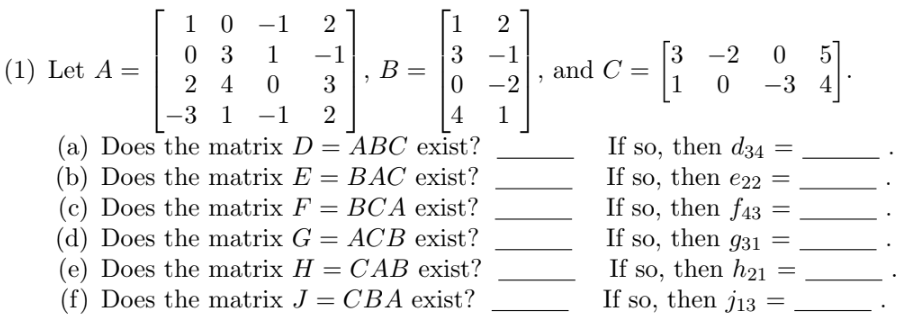

In [180]:
# A is 4 x 4, B is 4 x 2, C is 2 x 4
# create matrices

A1 = Matrix(np.matrix('1 0 -1 2;0 3 1 -1;2 4 0 3;-3 1 -1 2'));
B1 = Matrix(np.matrix('1 2;3 -1;0 -2;4 1'));
C1 = Matrix(np.matrix('3 -2 0 5;1 0 -3 4'))

In [181]:
# A is 4 x 4, B is 4 x 2, C is 2 x 4
# (a) ABC? 4x4 @ 4x2 = 4x2 @ 2x4 = 4x4 --> yes it exists
D1 = A1 @ B1 @ C1
mprint(D1)
ansprint(f"(a) ABC exists and d34 = {D1[2,3]}");

<IPython.core.display.Math object>

***********************************--ANSWER--***********************************

(a) ABC exists and d34 = 142

***********************************--ANSWER--***********************************


In [182]:
# A is 4 x 4, B is 4 x 2, C is 2 x 4
# (b) BAC? 4x2 @ 4x4 --> does not exist
ansprint("(b) matrix BAC does not exist")

***********************************--ANSWER--***********************************

(b) matrix BAC does not exist

***********************************--ANSWER--***********************************


In [183]:
# A is 4 x 4, B is 4 x 2, C is 2 x 4
# (c) BCA? 4x2 @ 2x4 = 4x4 @ 4x4 = 4x4 --> exists
F1 = B1 @ C1 @ A1
mprint(F1)
ansprint(f"(c) BCA exists and f43 = {F1[3,2]}")

<IPython.core.display.Math object>

***********************************--ANSWER--***********************************

(c) BCA exists and f43 = -45

***********************************--ANSWER--***********************************


In [184]:
# A is 4 x 4, B is 4 x 2, C is 2 x 4
# (d) ACB? 4x4 @ 2x4 --> does not exist
ansprint("(d) matrix ACB does not exist")

***********************************--ANSWER--***********************************

(d) matrix ACB does not exist

***********************************--ANSWER--***********************************


In [185]:
# A is 4 x 4, B is 4 x 2, C is 2 x 4
# (e) CAB? 2x4 @ 4x4 = 2x4 @ 4x2 = 2x2 --> exists
H1 = C1 @ A1 @ B1
mprint(H1)
ansprint(f"(e) CAB exists and f21 = {H1[1,0]}")

<IPython.core.display.Math object>

***********************************--ANSWER--***********************************

(e) CAB exists and f21 = -37

***********************************--ANSWER--***********************************


In [186]:
# A is 4 x 4, B is 4 x 2, C is 2 x 4
# (f) CBA? 2x4 @ 4x2 = 2x2 @ 4x4 --> does not exist
ansprint("(f) matrix CBA does not exist")

***********************************--ANSWER--***********************************

(f) matrix CBA does not exist

***********************************--ANSWER--***********************************


# Exercise 2

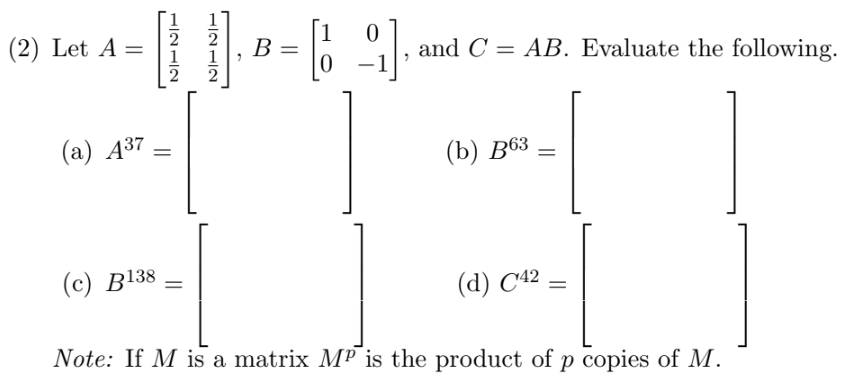

In [187]:
A2 = Matrix(np.matrix('0.5 0.5;0.5 0.5'))
A2

Matrix([
[0.5, 0.5],
[0.5, 0.5]])

In [188]:
A2 ** 37

Matrix([
[0.5, 0.5],
[0.5, 0.5]])

In [189]:
ansprint("(a) A^37 is still A")

***********************************--ANSWER--***********************************

(a) A^37 is still A

***********************************--ANSWER--***********************************


In [190]:
B2 = Matrix(np.matrix('1 0;0 -1'))
B2

Matrix([
[1,  0],
[0, -1]])

In [191]:
ansprint("(b) B^63 is:")
B2 ** 63

***********************************--ANSWER--***********************************

(b) B^63 is:

***********************************--ANSWER--***********************************


Matrix([
[1,  0],
[0, -1]])

In [192]:
ansprint("(c) B^138 is:")
B2 ** 138

***********************************--ANSWER--***********************************

(c) B^138 is:

***********************************--ANSWER--***********************************


Matrix([
[1, 0],
[0, 1]])

In [193]:
# matrix switches back and forth every time it's multiplied by B2
mats = latex(B2)
for x in range(8):
    mats += latex(B2 ** (x+2))
display(Math(mats))

<IPython.core.display.Math object>

In [194]:
C2 = A2 @ B2; C2

Matrix([
[0.5, -0.5],
[0.5, -0.5]])

In [195]:
ansprint("(d) C^42 is:")
C2 ** 42

***********************************--ANSWER--***********************************

(d) C^42 is:

***********************************--ANSWER--***********************************


Matrix([
[0, 0],
[0, 0]])

In [196]:
# matrix C become zero after squaring
mats = latex(C2)
for x in range(8):
    mats += latex(C2 ** (x+2))
display(Math(mats))

<IPython.core.display.Math object>

# Exercise 3

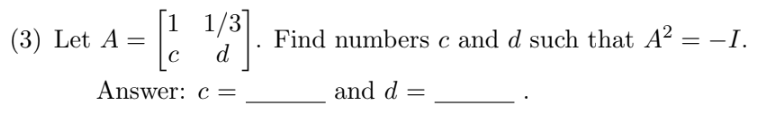

In [197]:
c, d = symbols(('c', 'd'));
A3 = Matrix([[1, Rational(1,3)],[c,d]]);
mprint(A3)
mprint(A3*A3)
mprint(-Matrix.eye(2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [198]:
# equations:
# c/3 + 1 = -1 --> c/3 = -2 --> c = -6
# d/3 + 1/3 = 0 --> d/3 = -1/3 --> d = -1
# cd + c = 0 --> 6 - 6 = 0 --> checks out
# c/3 + d*d = -1 --> -2 + 1 = -1 --> checks out
ansprint("c = -6, d = -1")

***********************************--ANSWER--***********************************

c = -6, d = -1

***********************************--ANSWER--***********************************


In [199]:
# check the answer
A3s = Matrix([[1, Rational(1,3)],[-6,-1]])
mprint(A3s)
mprint(A3s ** 2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 4

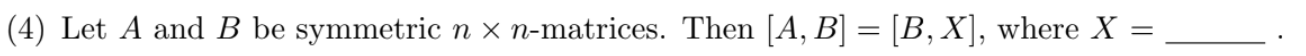

In [200]:
# a symmetric matrix is equal to it's transpose
# [A,B] = AB - BA
# [B,X] = BX - XB
# if [A,B] = [B,X], then AB - BA = BX - XB, therefore X = -A
# check: AB - BA = B*(-1)*A - (-1)*A*B = -BA + AB = AB - BA --> checks out
ansprint("X = -A")

***********************************--ANSWER--***********************************

X = -A

***********************************--ANSWER--***********************************


# Exercise 5

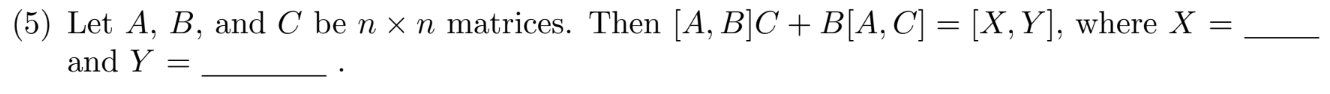

In [201]:
# [A,B]*C + B[A,C] = ABC - BAC + BAC - BCA = XY - YX
# BAC cancels out
# ABC - BCA = XY - YX
ansprint("X = A, Y = BC")

***********************************--ANSWER--***********************************

X = A, Y = BC

***********************************--ANSWER--***********************************


# Exercise 6

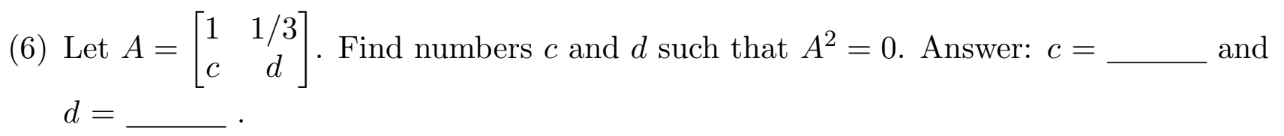

In [202]:
# So when he says A^2 = 0, he really means that it equals the 2x2 zero matrix.
# I don't like that shorthand when "matrix" = "scalar"
c, d = symbols(('c', 'd'));
A6 = Matrix([[1, Rational(1,3)],[c,d]]);
mprint(A6)
mprint(A6 ** 2)
mprint(-Matrix.zeros(2,2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [203]:
# equations:
# c/3 + 1 = 0 --> c/3 = -1 --> c = -3
# d/3 + 1/3 = 0 --> d/3 = -1/3 --> d = -1
# cd + c = 0 --> 3 - 3 = 0 --> checks out
# c/3 + d*d = 0 --> -1 + 1 = 0 --> checks out
ansprint("c = -3, d = -1")

***********************************--ANSWER--***********************************

c = -3, d = -1

***********************************--ANSWER--***********************************


In [204]:
# check the answer
A6s = Matrix([[1, Rational(1,3)],[-3,-1]])
mprint(A6s)
mprint(A6s ** 2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 7

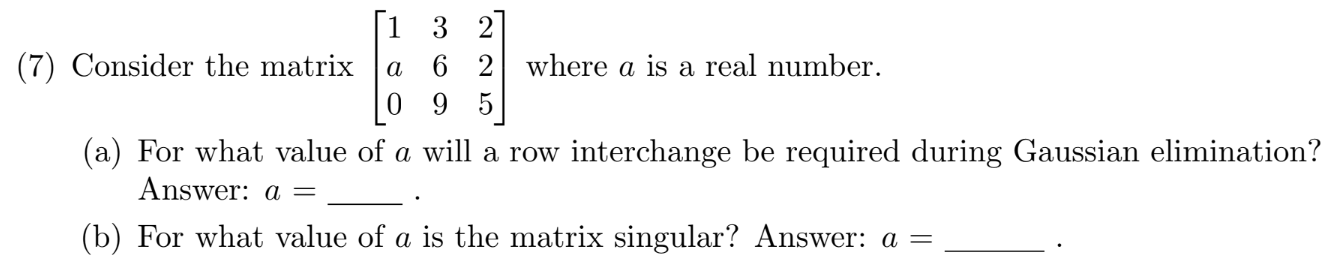

In [205]:
# similar to a problem in chapter 1
# if a = 2, then subtracting 2*row1 from row2 will give zeros in the first two
#   columns and that row will have to be moved to the bottom
ansprint("(a) a = 2")

***********************************--ANSWER--***********************************

(a) a = 2

***********************************--ANSWER--***********************************


In [206]:
# if the matrix is singlular, then at least two of the rows are dependent and
#   there is at least one free variable
a = symbols('a')
A7 = Matrix([[1,3,2],[a,6,2],[0,9,5]])
A7

Matrix([
[1, 3, 2],
[a, 6, 2],
[0, 9, 5]])

In [207]:
n7a = A7.row_replace(2, -a, 1); n7a

Matrix([
[1,       3,       2],
[0, 6 - 3*a, 2 - 2*a],
[0,       9,       5]])

In [208]:
n7b = n7a.row_replace(3, -9/(6-3*a), 2); n7b

Matrix([
[1,       3,                          2],
[0, 6 - 3*a,                    2 - 2*a],
[0,       0, -9*(2 - 2*a)/(6 - 3*a) + 5]])

In [209]:
# if a = 2, then the second column is a free variable
# let's check that
A7s = Matrix([[1,3,2],[2,6,2],[0,9,5]])
A7s

Matrix([
[1, 3, 2],
[2, 6, 2],
[0, 9, 5]])

In [210]:
A7s.rref()[0]
# that didn't work!  maybe because there would be a divide by zero in n7b[2,2]?

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [211]:
# 9*(2-2a)/(6-3a) = 5
# 18 - 18a = 30 - 15a
# -12 = 3a
# a = -4
# let's try that
A7s2 = Matrix([[1,3,2],[-4,6,2],[0,9,5]])
A7s2

Matrix([
[ 1, 3, 2],
[-4, 6, 2],
[ 0, 9, 5]])

In [212]:
A7s2.rref()[0]

Matrix([
[1, 0, 1/3],
[0, 1, 5/9],
[0, 0,   0]])

In [213]:
ansprint("(b) when a = -4 the matrix is singlular")

***********************************--ANSWER--***********************************

(b) when a = -4 the matrix is singlular

***********************************--ANSWER--***********************************


# Exercise 8

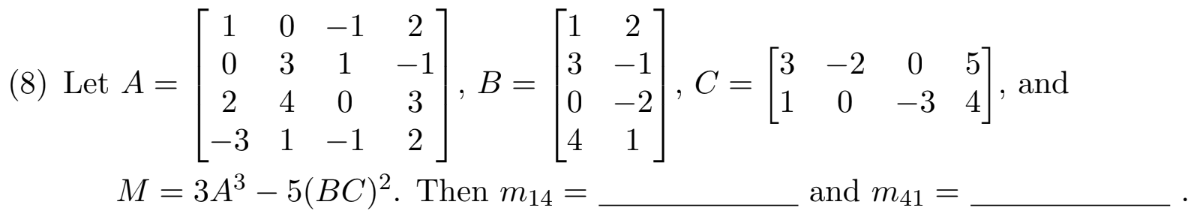

In [214]:
# let sympy do all the work!
A8 = Matrix(np.matrix('1 0 -1 2;0 3 1 -1;2 4 0 3;-3 1 -1 2'))
B8 = Matrix(np.matrix('1 2;3 -1;0 -2;4 1'));
C8 = Matrix(np.matrix('3 -2 0 5;1 0 -3 4'));
display(Math(latex(A8) + latex(B8) + latex(C8)));

<IPython.core.display.Math object>

In [215]:
M8 = 3*A8**3 - 5 * (B8*C8)**2
M8

Matrix([
[-1016,  465,  561, -2060],
[ -588,  490,  432, -1372],
[  549, -199, -312,  1270],
[-1562,  865, 1014, -3492]])

In [216]:
ansprint(f"m14 = {M8[0,3]} and m41 = {M8[3,0]}");

***********************************--ANSWER--***********************************

m14 = -2060 and m41 = -1562

***********************************--ANSWER--***********************************


# Exercise 9

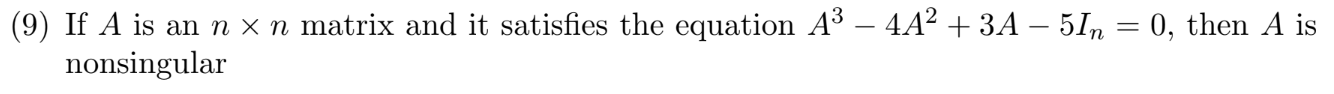

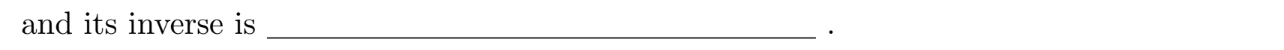

In [217]:
# non-singular means it is invertible, which means A*A^-1 = I
# rearranging gives A*(A^2 - 4A +3I)/5 = I
# (need to include I with the 3 because it needs to be a matrix and because 3*A = 3*A*I)
# So A times something = I, so A must be non-singular (i.e. invertible)
ansprint("the inverse is 1/5 * (A^2 - 4A + 3*I)");

***********************************--ANSWER--***********************************

the inverse is 1/5 * (A^2 - 4A + 3*I)

***********************************--ANSWER--***********************************


# Exercise 10

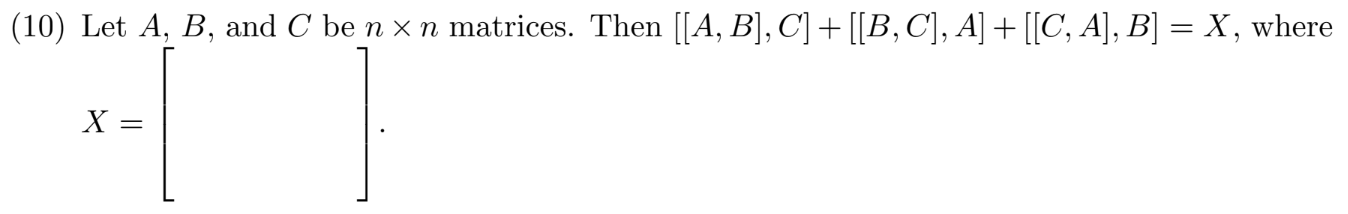

In [316]:
# well this is going to be a lot of attention to detail!
# [A,B] = AB - BA
# [B,C] = BC - CB
# [C,A] = CA - AC
# [[A,B],C] = (AB - BA) * C - C * (AB - BA) = ABC - BAC - CAB + CBA
# [[B,C],A] = (BC - CB) * A - A * (BC - CB) = BCA - CBA - ABC + ACB
# [[C,A],B] = (CA - AC) * B - B * (CA - AC) = CAB - ACB - BCA + BAC
# now cancel: ABC - BAC - CAB + BAC + BCA - CBA - ABC + ACB + CAB - ACB - BCA + BAC = 0
ansprint("X = the n x n zero matrix")

***********************************--ANSWER--***********************************

X = the n x n zero matrix

***********************************--ANSWER--***********************************


# Exercise 11

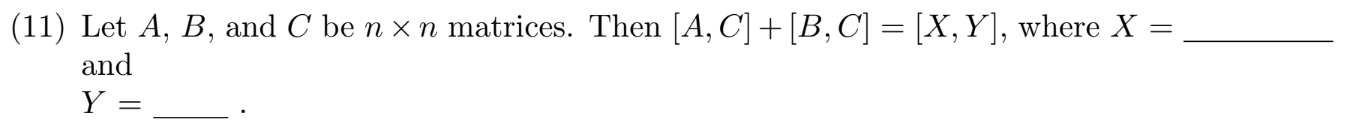

In [219]:
# [A,C] = AC - CA
# [B,C] = BC - CB
# [X,Y] = XY - YX
# equation AC - CA + BC - CB = XY - YX
# NOTE: C(A+B) = CA + CB, and (A+B)C = AC + BC
# therefore: (A+B)C - C(A+B) = XY - YX
ansprint("X = (A+B), Y = C")

***********************************--ANSWER--***********************************

X = (A+B), Y = C

***********************************--ANSWER--***********************************


# Exercise 12

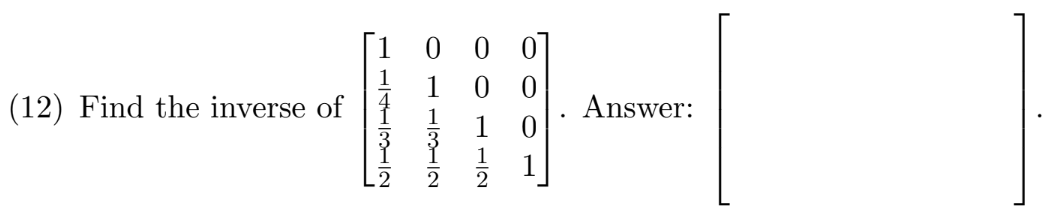

In [220]:
# for a simple 2x2 matrix, the inverse of this type of matrix is just the
#   negative of the off-diagonal elements
a = symbols('a')
T12 = Matrix([[1,0],[a,1]]);
T12inv = Matrix([[1,0],[-a,1]]);
display(Math(latex(T12) + "*" + latex(T12inv) + "=" + latex(T12*T12inv)));

<IPython.core.display.Math object>

In [221]:
# let's see if that works for a larger matrix...
half = Rational(1,2);
third = Rational(1,3)
fourth = Rational(1,4);
A12 = Matrix([[1,0,0,0],
              [fourth,1,0,0],
              [third,third,1,0],
              [half,half,half,1]]);
A12inv = Matrix([[1,0,0,0],
              [-fourth,1,0,0],
              [-third,-third,1,0],
              [-half,-half,-half,1]]);
display(Math(latex(A12) + "*" + latex(A12inv) + "=" + latex(A12*A12inv)));

<IPython.core.display.Math object>

In [222]:
# try taking the negative of all the elements below the diagonal
A12inv = Matrix([[1,0,0,0],
              [-fourth,1,0,0],
              [-third,-third,1,0],
              [-half,-half,-half,1]]);
display(Math(latex(A12) + "*" + latex(A12inv) + "=" + latex(A12*A12inv)));

<IPython.core.display.Math object>

In [223]:
# That didn't work, but the row right off the diagonal is zeros
# try taking the negative of all the elements and flip them
A12inv2 = Matrix([[1,0,0,0],
              [-half,1,0,0],
              [-half,-third,1,0],
              [-half,-third,-fourth,1]]);
display(Math(latex(A12) + "*" + latex(A12inv2) + "=" + latex(A12*A12inv2)));

<IPython.core.display.Math object>

In [224]:
# Nope, maybe it's a combination of elements
# Just played around with different fractions until I got it to work
A12inv3 = Matrix([[1,0,0,0],
              [-fourth,1,0,0],
              [-fourth,-third,1,0],
              [-fourth,-third,-half,1]]);
display(Math(latex(A12) + "*" + latex(A12inv3) + "=" + latex(A12*A12inv3)));

<IPython.core.display.Math object>

In [225]:
ansprint("The inverse of the matrix is below:");
mprint(A12inv3)

***********************************--ANSWER--***********************************

The inverse of the matrix is below:

***********************************--ANSWER--***********************************


<IPython.core.display.Math object>

In [226]:
# The proper way to solve this process is to set up an augmented matrix with
# A12 and the Identity matrix and then solve using Gauss-Jordan
# Let's do that
Aug12 = Matrix.hstack(A12, Matrix.eye(4));
Aug12

Matrix([
[  1,   0,   0, 0, 1, 0, 0, 0],
[1/4,   1,   0, 0, 0, 1, 0, 0],
[1/3, 1/3,   1, 0, 0, 0, 1, 0],
[1/2, 1/2, 1/2, 1, 0, 0, 0, 1]])

In [227]:
n12a = Aug12.row_replace(4, -half, 1); n12a

Matrix([
[  1,   0,   0, 0,    1, 0, 0, 0],
[1/4,   1,   0, 0,    0, 1, 0, 0],
[1/3, 1/3,   1, 0,    0, 0, 1, 0],
[  0, 1/2, 1/2, 1, -1/2, 0, 0, 1]])

In [228]:
n12b = n12a.row_replace(3, -third, 1); n12b

Matrix([
[  1,   0,   0, 0,    1, 0, 0, 0],
[1/4,   1,   0, 0,    0, 1, 0, 0],
[  0, 1/3,   1, 0, -1/3, 0, 1, 0],
[  0, 1/2, 1/2, 1, -1/2, 0, 0, 1]])

In [229]:
n12c = n12b.row_replace(2, -fourth, 1); n12c

Matrix([
[1,   0,   0, 0,    1, 0, 0, 0],
[0,   1,   0, 0, -1/4, 1, 0, 0],
[0, 1/3,   1, 0, -1/3, 0, 1, 0],
[0, 1/2, 1/2, 1, -1/2, 0, 0, 1]])

In [230]:
n12d = n12c.row_replace(4, -half, 2); n12d

Matrix([
[1,   0,   0, 0,    1,    0, 0, 0],
[0,   1,   0, 0, -1/4,    1, 0, 0],
[0, 1/3,   1, 0, -1/3,    0, 1, 0],
[0,   0, 1/2, 1, -3/8, -1/2, 0, 1]])

In [231]:
n12e = n12d.row_replace(3, -third, 2); n12e

Matrix([
[1, 0,   0, 0,    1,    0, 0, 0],
[0, 1,   0, 0, -1/4,    1, 0, 0],
[0, 0,   1, 0, -1/4, -1/3, 1, 0],
[0, 0, 1/2, 1, -3/8, -1/2, 0, 1]])

In [232]:
n12f = n12e.row_replace(4, -half, 3); n12f

Matrix([
[1, 0, 0, 0,    1,    0,    0, 0],
[0, 1, 0, 0, -1/4,    1,    0, 0],
[0, 0, 1, 0, -1/4, -1/3,    1, 0],
[0, 0, 0, 1, -1/4, -1/3, -1/2, 1]])

In [233]:
# that worked, right hand side is the inverse of A12 found above

# Exercise 13

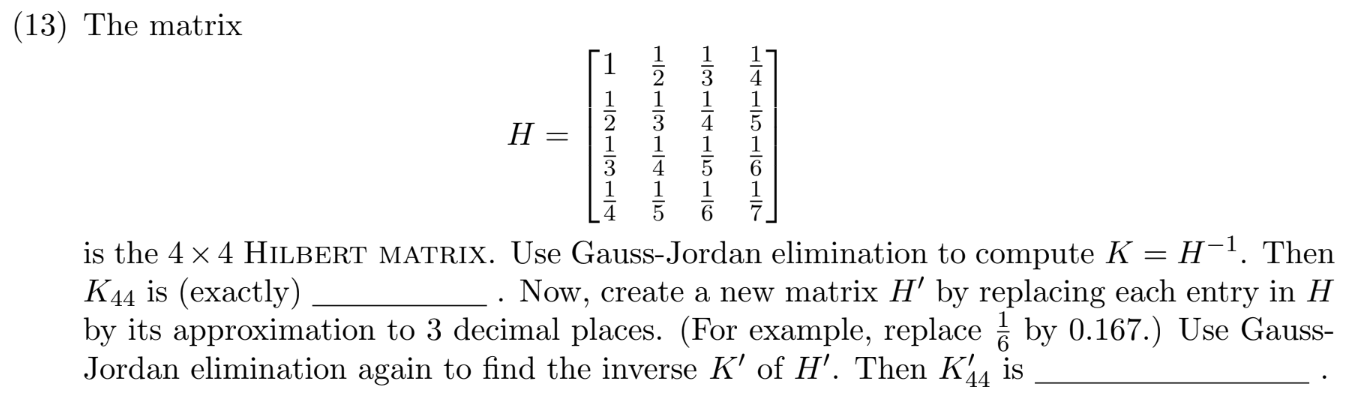

In [234]:
# exact fractions
half = Rational(1,2);
third = Rational(1,3)
fourth = Rational(1,4);
fifth = Rational(1,5);
sixth = Rational(1,6);
seventh = Rational(1,7);
H = Matrix([[1, half, third, fourth],
            [half, third, fourth, fifth],
            [third, fourth, fifth, sixth],
            [fourth, fifth, sixth, seventh]]);
mprint(H)
AugH = Matrix.hstack(H, Matrix.eye(4));
mprint(AugH)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [235]:
ka = AugH.row_replace(4,-fourth,1); ka

Matrix([
[  1,  1/2,  1/3,   1/4,    1, 0, 0, 0],
[1/2,  1/3,  1/4,   1/5,    0, 1, 0, 0],
[1/3,  1/4,  1/5,   1/6,    0, 0, 1, 0],
[  0, 3/40, 1/12, 9/112, -1/4, 0, 0, 1]])

In [236]:
kb = ka.row_replace(3, -third, 1); kb

Matrix([
[  1,  1/2,  1/3,   1/4,    1, 0, 0, 0],
[1/2,  1/3,  1/4,   1/5,    0, 1, 0, 0],
[  0, 1/12, 4/45,  1/12, -1/3, 0, 1, 0],
[  0, 3/40, 1/12, 9/112, -1/4, 0, 0, 1]])

In [237]:
kc = kb.row_replace(2, -half, 1); kc

Matrix([
[1,  1/2,  1/3,   1/4,    1, 0, 0, 0],
[0, 1/12, 1/12,  3/40, -1/2, 1, 0, 0],
[0, 1/12, 4/45,  1/12, -1/3, 0, 1, 0],
[0, 3/40, 1/12, 9/112, -1/4, 0, 0, 1]])

In [238]:
kd = kc.row_replace(4, Rational(-36,40), 3); kd

Matrix([
[1,  1/2,   1/3,   1/4,    1, 0,     0, 0],
[0, 1/12,  1/12,  3/40, -1/2, 1,     0, 0],
[0, 1/12,  4/45,  1/12, -1/3, 0,     1, 0],
[0,    0, 1/300, 3/560, 1/20, 0, -9/10, 1]])

In [239]:
ke = kd.row_replace(3, -1, 2); ke

Matrix([
[1,  1/2,   1/3,   1/4,    1,  0,     0, 0],
[0, 1/12,  1/12,  3/40, -1/2,  1,     0, 0],
[0,    0, 1/180, 1/120,  1/6, -1,     1, 0],
[0,    0, 1/300, 3/560, 1/20,  0, -9/10, 1]])

In [240]:
kf = ke.row_replace(4, Rational(-180,300), 3); kf

Matrix([
[1,  1/2,   1/3,    1/4,     1,   0,    0, 0],
[0, 1/12,  1/12,   3/40,  -1/2,   1,    0, 0],
[0,    0, 1/180,  1/120,   1/6,  -1,    1, 0],
[0,    0,     0, 1/2800, -1/20, 3/5, -3/2, 1]])

In [241]:
kg = kf.row_scale(2, 12); kg

Matrix([
[1, 1/2,   1/3,    1/4,     1,   0,    0, 0],
[0,   1,     1,   9/10,    -6,  12,    0, 0],
[0,   0, 1/180,  1/120,   1/6,  -1,    1, 0],
[0,   0,     0, 1/2800, -1/20, 3/5, -3/2, 1]])

In [242]:
kh = kg.row_scale(3,180); kh

Matrix([
[1, 1/2, 1/3,    1/4,     1,    0,    0, 0],
[0,   1,   1,   9/10,    -6,   12,    0, 0],
[0,   0,   1,    3/2,    30, -180,  180, 0],
[0,   0,   0, 1/2800, -1/20,  3/5, -3/2, 1]])

In [243]:
ki = kh.row_scale(4, 2800); ki

Matrix([
[1, 1/2, 1/3,  1/4,    1,    0,     0,    0],
[0,   1,   1, 9/10,   -6,   12,     0,    0],
[0,   0,   1,  3/2,   30, -180,   180,    0],
[0,   0,   0,    1, -140, 1680, -4200, 2800]])

In [244]:
kj = ki.row_replace(3, Rational(-3,2), 4); kj

Matrix([
[1, 1/2, 1/3,  1/4,    1,     0,     0,     0],
[0,   1,   1, 9/10,   -6,    12,     0,     0],
[0,   0,   1,    0,  240, -2700,  6480, -4200],
[0,   0,   0,    1, -140,  1680, -4200,  2800]])

In [245]:
kk = kj.row_replace(2, -1, 3); kk

Matrix([
[1, 1/2, 1/3,  1/4,    1,     0,     0,     0],
[0,   1,   0, 9/10, -246,  2712, -6480,  4200],
[0,   0,   1,    0,  240, -2700,  6480, -4200],
[0,   0,   0,    1, -140,  1680, -4200,  2800]])

In [246]:
kl = kk.row_replace(2, Rational(-9,10), 4); kl

Matrix([
[1, 1/2, 1/3, 1/4,    1,     0,     0,     0],
[0,   1,   0,   0, -120,  1200, -2700,  1680],
[0,   0,   1,   0,  240, -2700,  6480, -4200],
[0,   0,   0,   1, -140,  1680, -4200,  2800]])

In [247]:
km = kl.row_replace(1, -half, 2); km

Matrix([
[1, 0, 1/3, 1/4,   61,  -600,  1350,  -840],
[0, 1,   0,   0, -120,  1200, -2700,  1680],
[0, 0,   1,   0,  240, -2700,  6480, -4200],
[0, 0,   0,   1, -140,  1680, -4200,  2800]])

In [248]:
kn = km.row_replace(1, -third, 3); kn

Matrix([
[1, 0, 0, 1/4,  -19,   300,  -810,   560],
[0, 1, 0,   0, -120,  1200, -2700,  1680],
[0, 0, 1,   0,  240, -2700,  6480, -4200],
[0, 0, 0,   1, -140,  1680, -4200,  2800]])

In [249]:
ko = kn.row_replace(1, -fourth, 4); ko

Matrix([
[1, 0, 0, 0,   16,  -120,   240,  -140],
[0, 1, 0, 0, -120,  1200, -2700,  1680],
[0, 0, 1, 0,  240, -2700,  6480, -4200],
[0, 0, 0, 1, -140,  1680, -4200,  2800]])

In [250]:
K = ko[0:4,4:8]; K

Matrix([
[  16,  -120,   240,  -140],
[-120,  1200, -2700,  1680],
[ 240, -2700,  6480, -4200],
[-140,  1680, -4200,  2800]])

In [251]:
# check the answer (Yay! It worked!)
mprint(H*K)

<IPython.core.display.Math object>

In [252]:
ansprint(f"k44 is exactly {K[3,3]}");

***********************************--ANSWER--***********************************

k44 is exactly 2800

***********************************--ANSWER--***********************************


In [253]:
# SECOND PART WITH THREE DECIMAL PLACES
# approximate fractions
d2 = 0.500;
d3 = 0.333;
d4 = 0.250;
d5 = 0.200;
d6 = 0.167;
d7 = 0.143;
Hp = Matrix([[1, d2, d3, d4],
            [d2, d3, d4, d5],
            [d3, d4, d5, d6],
            [d4, d5, d6, d7]]);
mprint(Hp)
AugHp = Matrix.hstack(Hp, Matrix.eye(4));
mprint(AugHp)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [254]:
kap = AugHp.row_replace(4,-d4,1); kap

Matrix([
[    1,   0.5,   0.333,   0.25,     1, 0, 0, 0],
[  0.5, 0.333,    0.25,    0.2,     0, 1, 0, 0],
[0.333,  0.25,     0.2,  0.167,     0, 0, 1, 0],
[    0, 0.075, 0.08375, 0.0805, -0.25, 0, 0, 1]])

In [255]:
kbp = kap.row_replace(3, -d3, 1); kbp

Matrix([
[  1,    0.5,    0.333,    0.25,      1, 0, 0, 0],
[0.5,  0.333,     0.25,     0.2,      0, 1, 0, 0],
[  0, 0.0835, 0.089111, 0.08375, -0.333, 0, 1, 0],
[  0,  0.075,  0.08375,  0.0805,  -0.25, 0, 0, 1]])

In [256]:
kcp = kbp.row_replace(2, -d2, 1); kcp

Matrix([
[1,    0.5,    0.333,    0.25,      1, 0, 0, 0],
[0,  0.083,   0.0835,   0.075,   -0.5, 1, 0, 0],
[0, 0.0835, 0.089111, 0.08375, -0.333, 0, 1, 0],
[0,  0.075,  0.08375,  0.0805,  -0.25, 0, 0, 1]])

In [257]:
factd = -kcp[3,1]/kcp[2,1]
kdp = kcp.row_replace(4, factd, 3); kdp

Matrix([
[1,    0.5,               0.333,                0.25,                  1, 0,                  0, 0],
[0,  0.083,              0.0835,               0.075,               -0.5, 1,                  0, 0],
[0, 0.0835,            0.089111,             0.08375,             -0.333, 0,                  1, 0],
[0,      0, 0.00371017964071856, 0.00527544910179638, 0.0491017964071857, 0, -0.898203592814371, 1]])

In [258]:
facte = -kdp[2,1]/kdp[1,1]
kep = kdp.row_replace(3, facte, 2); kep

Matrix([
[1,   0.5,               0.333,                0.25,                  1,                 0,                  0, 0],
[0, 0.083,              0.0835,               0.075,               -0.5,                 1,                  0, 0],
[0,     0, 0.00510798795180727, 0.00829819277108436,  0.170012048192771, -1.00602409638554,                  1, 0],
[0,     0, 0.00371017964071856, 0.00527544910179638, 0.0491017964071857,                 0, -0.898203592814371, 1]])

In [259]:
factf = -kep[3,2]/kep[2,2];
kfp = kep.row_replace(4, factf, 3); kfp

Matrix([
[1,   0.5,                0.333,                  0.25,                   1,                 0,                 0, 0],
[0, 0.083,               0.0835,                 0.075,                -0.5,                 1,                 0, 0],
[0,     0,  0.00510798795180727,   0.00829819277108436,   0.170012048192771, -1.00602409638554,                 1, 0],
[0,     0, 4.33680868994202e-19, -0.000751931182673948, -0.0743862082304338, 0.730724143380429, -1.62455214252186, 1]])

In [260]:
factg = 1/kfp[1,1];
kgp = kfp.row_scale(2, factg); kgp

Matrix([
[1, 0.5,                0.333,                  0.25,                   1,                 0,                 0, 0],
[0, 1.0,     1.00602409638554,     0.903614457831325,   -6.02409638554217,  12.0481927710843,                 0, 0],
[0,   0,  0.00510798795180727,   0.00829819277108436,   0.170012048192771, -1.00602409638554,                 1, 0],
[0,   0, 4.33680868994202e-19, -0.000751931182673948, -0.0743862082304338, 0.730724143380429, -1.62455214252186, 1]])

In [261]:
facth = 1/kgp[2,2];
khp = kgp.row_scale(3, facth); khp

Matrix([
[1, 0.5,                0.333,                  0.25,                   1,                 0,                 0, 0],
[0, 1.0,     1.00602409638554,     0.903614457831325,   -6.02409638554217,  12.0481927710843,                 0, 0],
[0,   0,                  1.0,      1.62455214252186,    33.2835648393843, -196.951149038948,   195.77180084111, 0],
[0,   0, 4.33680868994202e-19, -0.000751931182673948, -0.0743862082304338, 0.730724143380429, -1.62455214252186, 1]])

In [262]:
facti = 1/khp[3,3];
kip = khp.row_scale(4, facti); kip

Matrix([
[1, 0.5,                 0.333,              0.25,                 1,                 0,                0,                 0],
[0, 1.0,      1.00602409638554, 0.903614457831325, -6.02409638554217,  12.0481927710843,                0,                 0],
[0,   0,                   1.0,  1.62455214252186,  33.2835648393843, -196.951149038948,  195.77180084111,                 0],
[0,   0, -5.76756063569522e-16,               1.0,  98.9268831303265, -971.796568911926, 2160.50641329275, -1329.90893720339]])

In [263]:
factj = -kip[2,3];
kjp = kip.row_replace(3, factj, 4); kjp

Matrix([
[1, 0.5,                 0.333,              0.25,                 1,                 0,                 0,                 0],
[0, 1.0,      1.00602409638554, 0.903614457831325, -6.02409638554217,  12.0481927710843,                 0,                 0],
[0,   0,                   1.0,                 0, -127.428315102998,  1381.78304908232, -3314.08352180585,  2160.50641329275],
[0,   0, -5.76756063569522e-16,               1.0,  98.9268831303265, -971.796568911926,  2160.50641329275, -1329.90893720339]])

In [264]:
factk = -kjp[1,2];
kkp = kjp.row_replace(2, factk, 3); kkp

Matrix([
[1, 0.5,                 0.333,              0.25,                 1,                 0,                 0,                 0],
[0, 1.0, -8.88178419700125e-16, 0.903614457831325,  122.171859169883, -1378.05885058281,  3334.04788037094,   -2173.521512168],
[0,   0,                   1.0,                 0, -127.428315102998,  1381.78304908232, -3314.08352180585,  2160.50641329275],
[0,   0, -5.76756063569522e-16,               1.0,  98.9268831303265, -971.796568911926,  2160.50641329275, -1329.90893720339]])

In [265]:
factl = -kkp[1,3];
klp = kkp.row_replace(2, factl, 4); klp

Matrix([
[1, 0.5,                 0.333, 0.25,                 1,                 0,                 0,                 0],
[0, 1.0, -3.67013302016822e-16,    0,  32.7800973051302,  -499.92942084312,  1381.78304908232, -971.796568911924],
[0,   0,                   1.0,    0, -127.428315102998,  1381.78304908232, -3314.08352180585,  2160.50641329275],
[0,   0, -5.76756063569522e-16,  1.0,  98.9268831303265, -971.796568911926,  2160.50641329275, -1329.90893720339]])

In [266]:
factm = -klp[0,1];
kmp = klp.row_replace(1, factm, 2); kmp

Matrix([
[1,   0,                 0.333, 0.25, -15.3900486525651,   249.96471042156, -690.891524541158,  485.898284455962],
[0, 1.0, -3.67013302016822e-16,    0,  32.7800973051302,  -499.92942084312,  1381.78304908232, -971.796568911924],
[0,   0,                   1.0,    0, -127.428315102998,  1381.78304908232, -3314.08352180585,  2160.50641329275],
[0,   0, -5.76756063569522e-16,  1.0,  98.9268831303265, -971.796568911926,  2160.50641329275, -1329.90893720339]])

In [267]:
factn = -kmp[0,2];
knp = kmp.row_replace(1, factn, 3); knp

Matrix([
[1,   0, -2.77555756156289e-16, 0.25,  27.0435802767331, -210.169044922852,   412.69828822019, -233.550351170522],
[0, 1.0, -3.67013302016822e-16,    0,  32.7800973051302,  -499.92942084312,  1381.78304908232, -971.796568911924],
[0,   0,                   1.0,    0, -127.428315102998,  1381.78304908232, -3314.08352180585,  2160.50641329275],
[0,   0, -5.76756063569522e-16,  1.0,  98.9268831303265, -971.796568911926,  2160.50641329275, -1329.90893720339]])

In [268]:
facto = -knp[0,3];
kop = knp.row_replace(1, facto, 4); kop

Matrix([
[1,   0, -1.33366740263909e-16,   0,  2.31185949415148,  32.7800973051299, -127.428315102997,  98.9268831303258],
[0, 1.0, -3.67013302016822e-16,   0,  32.7800973051302,  -499.92942084312,  1381.78304908232, -971.796568911924],
[0,   0,                   1.0,   0, -127.428315102998,  1381.78304908232, -3314.08352180585,  2160.50641329275],
[0,   0, -5.76756063569522e-16, 1.0,  98.9268831303265, -971.796568911926,  2160.50641329275, -1329.90893720339]])

In [269]:
Kp = kop[0:4,4:8]; Kp

Matrix([
[ 2.31185949415148,  32.7800973051299, -127.428315102997,  98.9268831303258],
[ 32.7800973051302,  -499.92942084312,  1381.78304908232, -971.796568911924],
[-127.428315102998,  1381.78304908232, -3314.08352180585,  2160.50641329275],
[ 98.9268831303265, -971.796568911926,  2160.50641329275, -1329.90893720339]])

In [270]:
# check the answer (it's very close, so I think all my math was correct)
mprint(Hp*Kp)

<IPython.core.display.Math object>

In [271]:
ansprint(f"k44 is approximately {Kp[3,3]} which is no where close to 2800!");

***********************************--ANSWER--***********************************

k44 is approximately -1329.90893720339 which is no where close to 2800!

***********************************--ANSWER--***********************************


In [272]:
# would sympy have gotten the same answers?  -- YES!
mprint(H.inv());
mprint(Hp.inv());

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 14

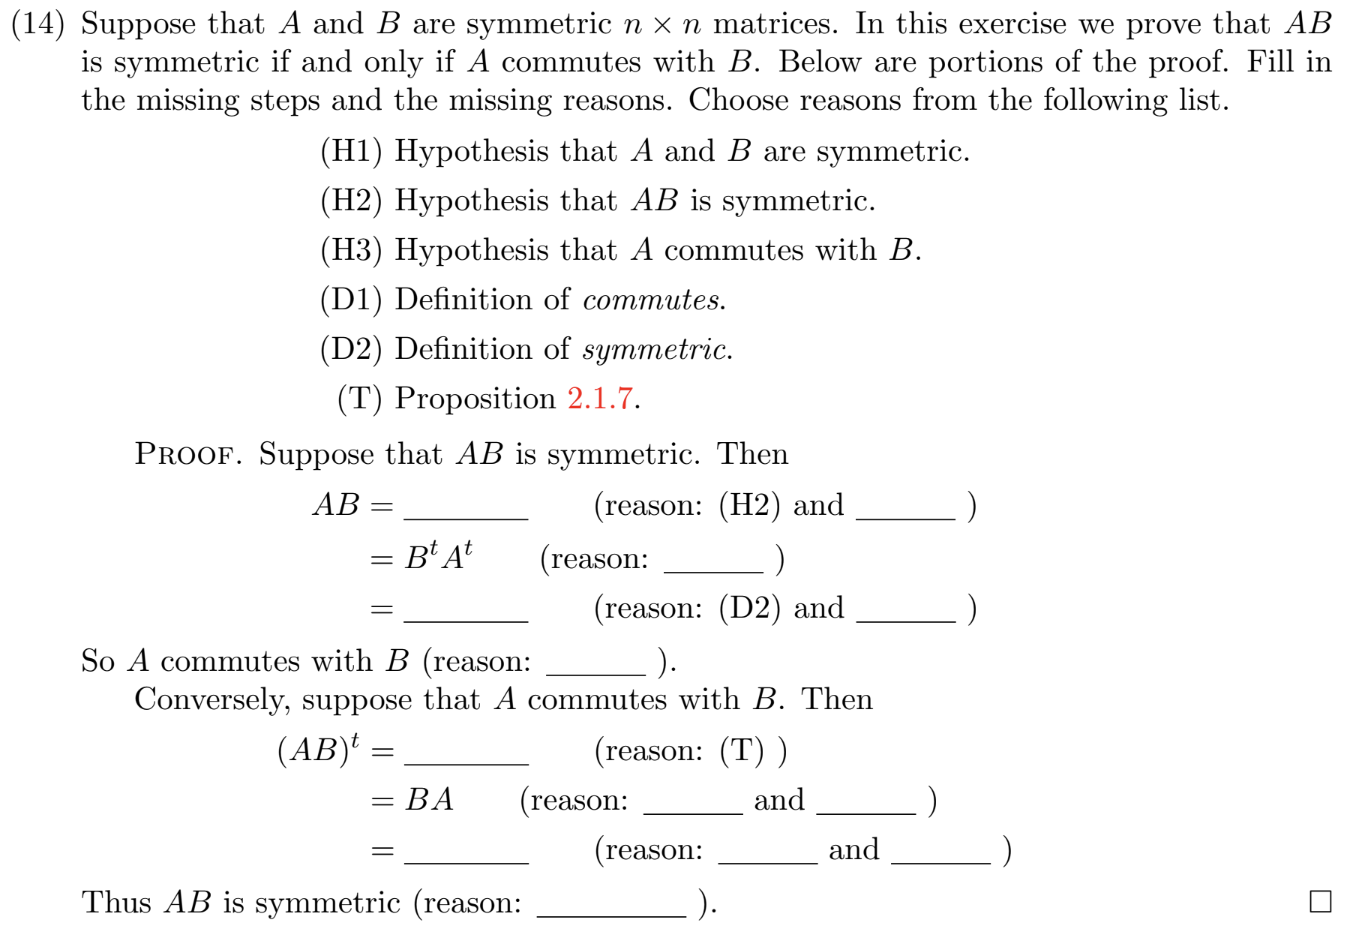

In [273]:
# Squre matrices are symmetric if they are equal to their transpose.
# It means they have an axis of reflection along the diagonal
# example
A14 = Matrix(np.matrix('1 2 3 4;2 2 5 6;3 5 3 7;4 6 7 4'));
mprint(A14); print();
mprint(A14.T)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [274]:
# check if they commute, i.e AB = BA (they do!)
display(Math(latex(A14 * A14.T) + "," + latex(A14.T * A14)));

<IPython.core.display.Math object>

In [275]:
# I'm not interested in solving proofs.
# I trust that the real mathematicians have proven all this stuff!
# Here's grok's answer:

In [276]:
ansprint("""
(H1) Hypothesis that A and B are symmetric.
(H2) Hypothesis that AB is symmetric.
(H3) Hypothesis that A commutes with B.
(D1) Definition of commutes.
(D2) Definition of symmetric.
(T) Proposition 2.1.7, which is:
    If A is an m × n matrix and B is an n × p matrix,
     then (AB).T = B.T * A.T

Proof. Suppose that AB is symmetric. Then

AB = (AB).T      (reason: (H2) and (D2))
   = B.T * A.T   (reason: (T))
   = BA          (reason: (D2) and (H1))

So A commutes with B (reason: (D1)).

Conversely, suppose that A commutes with B. Then

(AB).T = B.T * A.T    (reason: (T))
       = BA           (reason: (H1) and (D2))
       = AB           (reason: (H3) and (D1))

Thus AB is symmetric (reason: (D2).""");

***********************************--ANSWER--***********************************


(H1) Hypothesis that A and B are symmetric.
(H2) Hypothesis that AB is symmetric.
(H3) Hypothesis that A commutes with B.
(D1) Definition of commutes.
(D2) Definition of symmetric.
(T) Proposition 2.1.7, which is:
    If A is an m × n matrix and B is an n × p matrix,
     then (AB).T = B.T * A.T

Proof. Suppose that AB is symmetric. Then

AB = (AB).T      (reason: (H2) and (D2))
   = B.T * A.T   (reason: (T))
   = BA          (reason: (D2) and (H1))

So A commutes with B (reason: (D1)).

Conversely, suppose that A commutes with B. Then

(AB).T = B.T * A.T    (reason: (T))
       = BA           (reason: (H1) and (D2))
       = AB           (reason: (H3) and (D1))

Thus AB is symmetric (reason: (D2).

***********************************--ANSWER--***********************************


# Problem 1

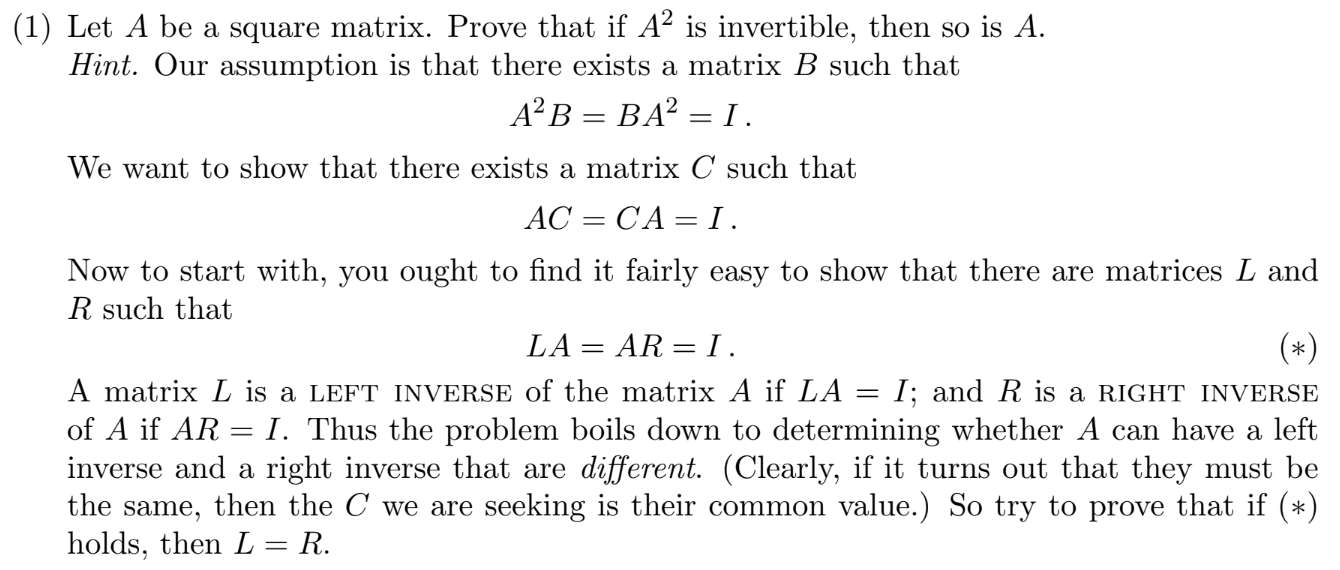

In [277]:
# If A^2 is invertible, it means it has an inverse that when multiplied by A^2 it gives the identity matrix
# If LA = AR = I, then L and R have to be the same because:
# - a matrix only has one unique inverse
# - multiplication of a matrix with its inverse if communative
# Therefore, if A^2 is invertible, then so is A.

In [278]:
ansprint("I didn't complete a full proof (according to grok).")

***********************************--ANSWER--***********************************

I didn't complete a full proof (according to grok).

***********************************--ANSWER--***********************************


# Problem 2

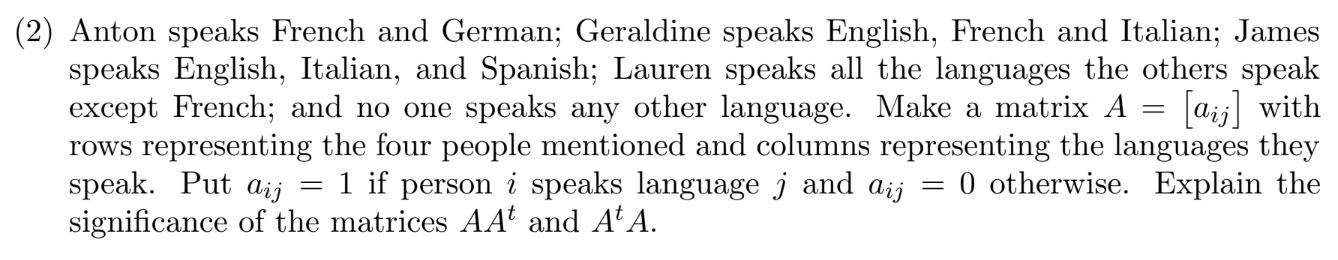

In [279]:
# languages: Fre Ger Eng Ita Spa
# Anton       1   1   0   0   0
# Geraldine   1   0   1   1   0
# James       0   0   1   1   1
# Lauren      0   1   1   1   1
P2 = Matrix(np.matrix('1 1 0 0 0;1 0 1 1 0;0 0 1 1 1;0 1 1 1 1'))
display(Math(latex(P2) + "," + latex(P2.T)))

<IPython.core.display.Math object>

In [280]:
display(Math(latex(P2*P2.T) + "," + latex(P2.T*P2)))

<IPython.core.display.Math object>

In [281]:
ansprint("A*A.T are all the number of languages that pairs of people have in common\n" +
         " (the diagonals are the number of languages spoken by each person)\n\n" +
         "A.T*A are all the number of people that pairs of languages have in common\n" +
         " (the diagonals are the number of people who speak each language)")

***********************************--ANSWER--***********************************

A*A.T are all the number of languages that pairs of people have in common
 (the diagonals are the number of languages spoken by each person)

A.T*A are all the number of people that pairs of languages have in common
 (the diagonals are the number of people who speak each language)

***********************************--ANSWER--***********************************


# Problem 3

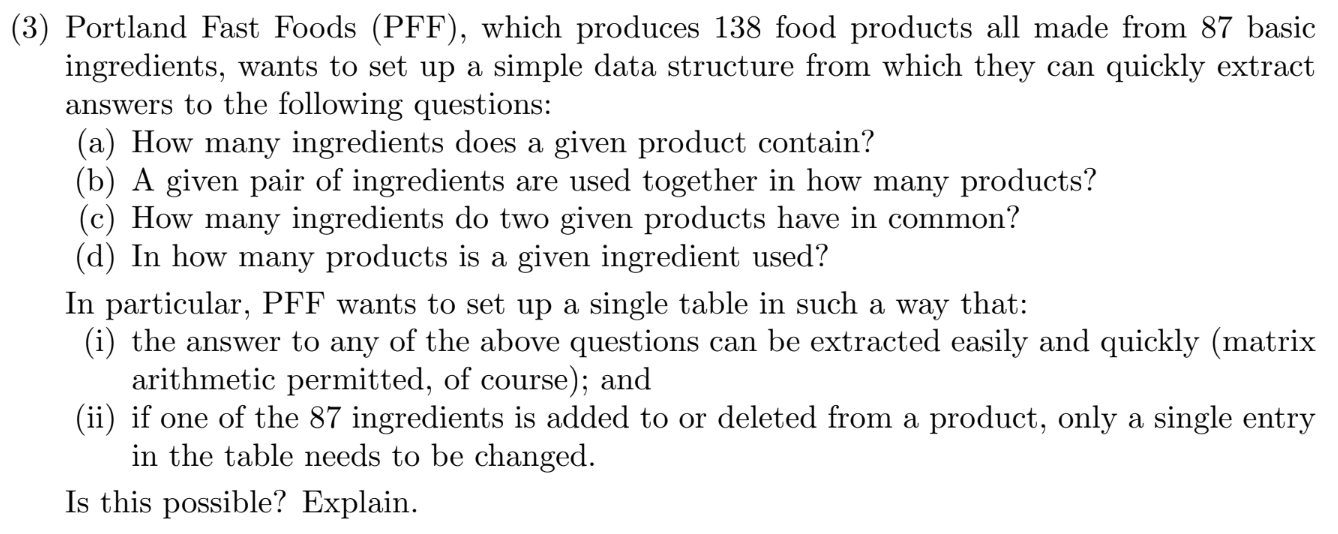

In [282]:
# Yes, this is possible with a matrix PFF with 138 rows representing products and
#  87 columns representing ingredients. If the product has the ingredient,
#  the matrix has a one, if it doesn't, a zero.
# Use these operations to get the desired information:
ansprint("""
(a) for product n, # of ingredients = PFF*PFF.T[n,n]
(b) for ingredients x & y, # of times used together = PFF.T*PFF[x,y]
(c) for products i & J, # of common ingredients = PFF*PFF.T[i,j]
(d) for ingredient k, # of products that use it = PFF.T*PFF[k,k]
""")


***********************************--ANSWER--***********************************


(a) for product n, # of ingredients = PFF*PFF.T[n,n]
(b) for ingredients x & y, # of times used together = PFF.T*PFF[x,y]
(c) for products i & J, # of common ingredients = PFF*PFF.T[i,j]
(d) for ingredient k, # of products that use it = PFF.T*PFF[k,k]


***********************************--ANSWER--***********************************


# Problem 4

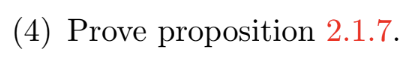

In [283]:
# I'm not doing the proofs. But I can test it.
# 2.1.7: If A is an m × n matrix and B is an n × p matrix, then (AB).T = B.T*A.T
P4A = Matrix(np.matrix('1 4 3 5;6 7 4 3;0 1 3 0'))
P4B = Matrix(np.matrix('5 3;1 0;9 6;4 7'))
P4a = (P4A*P4B).T
P4b = P4B.T * P4A.T
display(Math("A="+latex(P4A) + ", B=" + latex(P4B) + ",(AB).T=" + latex(P4a) + ",B.T*A.T=" + latex(P4b)))

<IPython.core.display.Math object>

# Problem 5

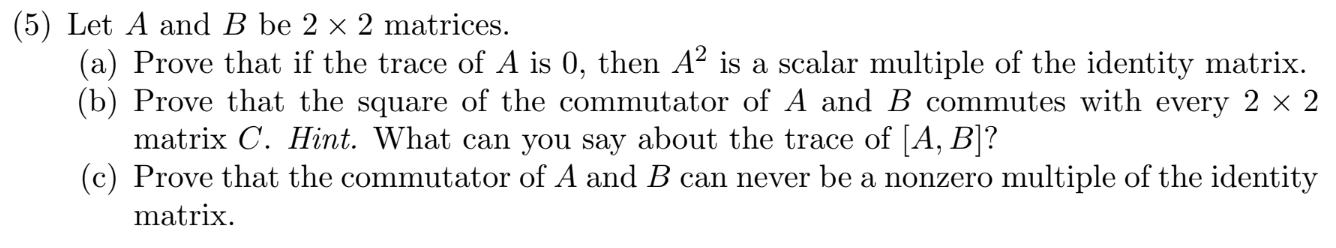

In [284]:
# 2x2 matrix with variables
a, b, c = symbols(('a', 'b', 'c'))
P5 = Matrix([[a,b],[c,-a]])
mprint(P5)
print(f"the trace is {P5.trace()}")

<IPython.core.display.Math object>

the trace is 0


In [285]:
# this is a scalar multiple of the identity matrix, scalar = a^2 + bc
mprint(P5*P5)

<IPython.core.display.Math object>

In [286]:
# part b is asking if [A,B]^2⋅C = C⋅[A,B]^2
# let's test it with random matrices
def commutator(A, B):
    return A*B - B*A
np.random.seed(88)
A = Matrix(np.random.randint(-9, 10, size=(2, 2)))
B = Matrix(np.random.randint(-9, 10, size=(2, 2)))
C = Matrix(np.random.randint(-9, 10, size=(2, 2)))
display(Math(latex(A) + latex(B) + latex(C)))

<IPython.core.display.Math object>

In [287]:
M1 = commutator(A,B)**2 * C
M2 = C * commutator(A,B)**2
display(Math(latex(M1) + latex(M2)))

<IPython.core.display.Math object>

In [288]:
mprint(commutator(A,B))

<IPython.core.display.Math object>

In [289]:
ansprint("(b) My testing code works for all random seeds checked.\n"+
         "    The trace of [A,B] is always zero.")

***********************************--ANSWER--***********************************

(b) My testing code works for all random seeds checked.
    The trace of [A,B] is always zero.

***********************************--ANSWER--***********************************


In [290]:
# A key property of traces is that trace(X⋅Y) = trace(Y⋅X)
# So: trace([A,B]) = trace(A⋅B) − trace(B⋅A) = 0
# 2x2 matrix with variables
a, b, c, d = symbols(('a', 'b', 'c', 'd'))
e, f, g, h = symbols(('e', 'f', 'g', 'h'))
AA = Matrix([[a,b],[c,d]])
BB = Matrix([[e,f],[g,h]])
mprint(commutator(AA,BB))

<IPython.core.display.Math object>

In [291]:
ansprint("The commutator of any 2x2 matrix is shown above. M11 is always -M22,\n"+
         "   so it can never be a multiple of the identity matrix (where M11 = M22)")

***********************************--ANSWER--***********************************

The commutator of any 2x2 matrix is shown above. M11 is always -M22,
   so it can never be a multiple of the identity matrix (where M11 = M22)

***********************************--ANSWER--***********************************


# Problem 6

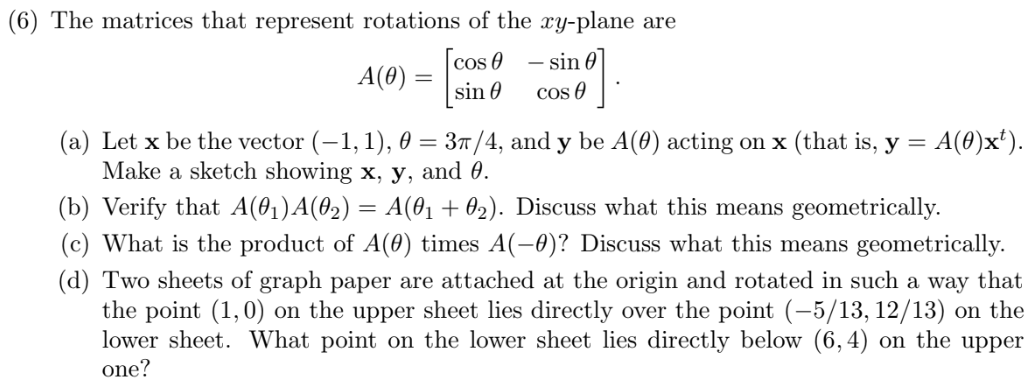

***********************************--ANSWER--***********************************

(a) plot:

***********************************--ANSWER--***********************************


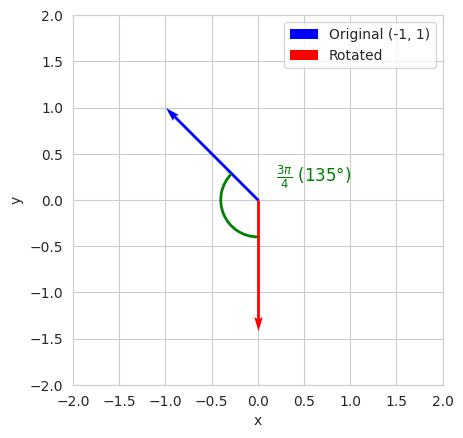

In [292]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import Matrix, cos, sin
from matplotlib.patches import Arc

# Create figure and axis
fig, ax = plt.subplots()

# Define the vector
x = [-1, 1]  # Original vector
theta = np.pi * 3 / 4  # Rotation angle (135 degrees)
Mrot = Matrix([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])  # Rotation matrix
Mx = Matrix(x)  # Create column matrix from list
My = Mrot * Mx  # Rotated vector

# Plot the vectors using quiver
ax.quiver(0, 0, float(Mx[0]), float(Mx[1]), angles='xy', scale_units='xy', scale=1, color='b', label='Original (-1, 1)')
ax.quiver(0, 0, float(My[0]), float(My[1]), angles='xy', scale_units='xy', scale=1, color='r', label='Rotated')

# Add angle arc
radius = 0.4  # Radius of the arc
start_angle = np.arctan2(float(Mx[1]), float(Mx[0])) * 180 / np.pi  # Angle of original vector
end_angle = start_angle + (theta * 180 / np.pi)  # Angle after rotation (135°)
arc = Arc((0, 0), radius * 2, radius * 2, theta1=min(start_angle, end_angle),
                      theta2=max(start_angle, end_angle), color='g', linewidth=2)
ax.add_patch(arc)

# Add angle label
angle_label = r'$\frac{3\pi}{4}$ (135°)'
ax.text(0.2, 0.2, angle_label, fontsize=12, color='g')

# Set axis limits
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# Add grid
ax.grid(True)

# Set labels and legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

# Make axes equal
ax.set_aspect('equal')

# Show plot
ansprint("(a) plot:")
plt.show()

In [293]:
# (b) Verify that A(θ1)*A(θ2) = A(θ1 + θ2)
t1, t2 = symbols(('t1', 't2'))
Arot1 = Matrix([[cos(t1), -sin(t1)], [sin(t1), cos(t1)]])
Arot2 = Matrix([[cos(t2), -sin(t2)], [sin(t2), cos(t2)]])
Arotmult = Arot1 * Arot2
display(Math(latex(Arot1) + latex(Arot2) + latex(Arotmult)))

<IPython.core.display.Math object>

In [294]:
Arotplus = Matrix([[cos(t1+t2), -sin(t1+t2)], [sin(t1+t2), cos(t1+t2)]])
# show the two are the same after simplification
ansprint("(b) the two are the same:\n    (doing two rotations separately is the same as doing them once after adding the angles)")
print()
display(Math(latex(Arotplus) + "=" + latex(simplify(Arotmult))))

***********************************--ANSWER--***********************************

(b) the two are the same:
    (doing two rotations separately is the same as doing them once after adding the angles)

***********************************--ANSWER--***********************************



<IPython.core.display.Math object>

In [295]:
# (c)
Arot1neg = Matrix([[cos(-t1), -sin(-t1)], [sin(-t1), cos(-t1)]])
Arotposneg = Arot1 * Arot1neg
display(Math(latex(Arot1) + latex(Arot1neg) + latex(Arotposneg)))

<IPython.core.display.Math object>

In [296]:
simplify(Arotposneg)

Matrix([
[1, 0],
[0, 1]])

In [297]:
ansprint("(c) the product of A(theta) * A(-theta) is the identity matrix.\n"+
         "    Geometrically, this just reverses the rotation to get back to\n"+
         "    the original vector.")

***********************************--ANSWER--***********************************

(c) the product of A(theta) * A(-theta) is the identity matrix.
    Geometrically, this just reverses the rotation to get back to
    the original vector.

***********************************--ANSWER--***********************************


In [298]:
# Need a matrix that moves (1,0) to (−5/13, 12/13)
# Are they the same length?
X5 = Matrix([[1],[0]])
N5 = Matrix([[Rational(-5,13)],[Rational(12,13)]])
display(Math(latex(X5) + latex(N5)))
N5.norm()

<IPython.core.display.Math object>

1

In [299]:
# So it's just a rotation
# formulat to rotate is Arot1 * X5 = N5
display(Math(latex(Arot1) + "*" + latex(X5) + "=" + latex(N5)))

<IPython.core.display.Math object>

In [300]:
# solve the left-hand side
display(Math(latex(Arot1 * X5)+ "=" + latex(N5)))

<IPython.core.display.Math object>

In [301]:
# so if cos(t1) = -5/13 and sin(t1) = 12/13, we don't actually need to calculte the angle
# we can substitute into the rotation matrix
Mrotd = Matrix([[Rational(-5,13), Rational(-12,13)],
                [Rational(12,13), Rational(-5,13)]])
Mrotd

Matrix([
[-5/13, -12/13],
[12/13,  -5/13]])

In [302]:
# test the rotation matrix
Mrotd * X5

Matrix([
[-5/13],
[12/13]])

In [303]:
# find point on lower sheet that is below point (6,4) on upper sheet
X64 = Matrix([[6],[4]])
print("Point on lower sheet is:")
display(Math(latex(Mrotd * X64)))

Point on lower sheet is:


<IPython.core.display.Math object>

***********************************--ANSWER--***********************************

(d) New point is at (-6,4) as shown:

***********************************--ANSWER--***********************************


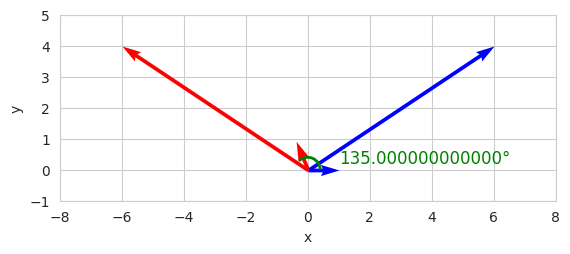

In [304]:
#Plot the results
# Create figure and axis
fig, ax = plt.subplots()

# Define the vector
Mx = Matrix([1,0])  # Create column matrix from list
My = Mrotd * Mx  # Rotated vector
Newx = Matrix([6,4])
Newy = Mrotd * Newx

# Plot the vectors using quiver
ax.quiver(0, 0, float(Mx[0]), float(Mx[1]), angles='xy', scale_units='xy', scale=1, color='b', label='Original (-1, 1)')
ax.quiver(0, 0, float(My[0]), float(My[1]), angles='xy', scale_units='xy', scale=1, color='r', label='Rotated')
ax.quiver(0, 0, float(Newx[0]), float(Newx[1]), angles='xy', scale_units='xy', scale=1, color='b', label='Original (6, 4)')
ax.quiver(0, 0, float(Newy[0]), float(Newy[1]), angles='xy', scale_units='xy', scale=1, color='r', label='Rotated')

# Add angle arc
radius = 0.4  # Radius of the arc
start_angle = np.arctan2(float(Mx[1]), float(Mx[0])) * 180 / np.pi  # Angle of original vector
end_angle = start_angle + (theta * 180 / np.pi)  # Angle after rotation (135°)
arc = Arc((0, 0), radius * 2, radius * 2, theta1=min(start_angle, end_angle),
                      theta2=max(start_angle, end_angle), color='g', linewidth=2)
ax.add_patch(arc)

# Add angle label
angle_label = str(round(theta/(2*pi)*360,1)) + '°'
ax.text(1, 0.2, angle_label, fontsize=12, color='g')

# Set axis limits
ax.set_xlim(-8, 8)
ax.set_ylim(-1, 5)

# Add grid
ax.grid(True)

# Set labels and legend
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.legend()

# Make axes equal
ax.set_aspect('equal')

# Show plot
ansprint("(d) New point is at (-6,4) as shown:")
plt.show()

# Problem 7

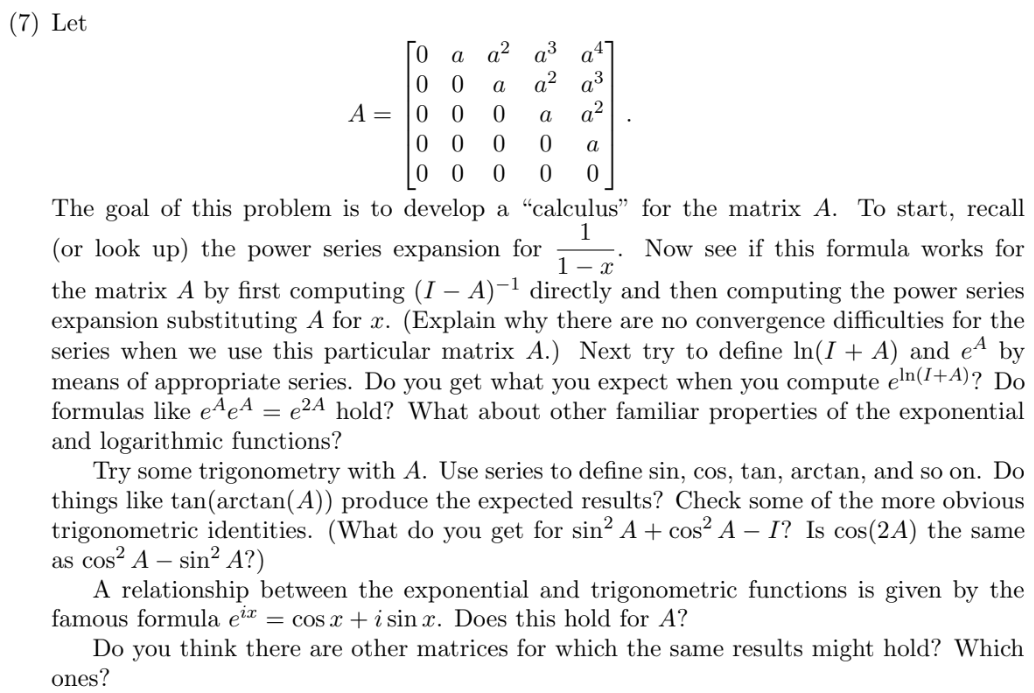

In [305]:
# expansion of 1/(1-x) = 1 + x + x^2 + x^3 + x^4 ...
# See if that works for matrices, e.g. (I-A)^-1 = I + A + A^2 + A^3 + A^4 ...
a = symbols('a')
A = Matrix([[0, a, a**2, a**3, a**4],
           [0, 0, a, a**2, a**3],
           [0, 0, 0, a, a**2],
           [0, 0, 0, 0, a],
           [0, 0, 0, 0, 0]])
I = Matrix.eye(5)
mprint(A)
mprint(I)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [306]:
DifIA = I-A
DifIA

Matrix([
[1, -a, -a**2, -a**3, -a**4],
[0,  1,    -a, -a**2, -a**3],
[0,  0,     1,    -a, -a**2],
[0,  0,     0,     1,    -a],
[0,  0,     0,     0,     1]])

In [307]:
DifIA.inv()

Matrix([
[1, a, 2*a**2, 4*a**3, 8*a**4],
[0, 1,      a, 2*a**2, 4*a**3],
[0, 0,      1,      a, 2*a**2],
[0, 0,      0,      1,      a],
[0, 0,      0,      0,      1]])

In [308]:
# this is the same as inverse above!
I+A+A**2+A**3+A**4

Matrix([
[1, a, 2*a**2, 4*a**3, 8*a**4],
[0, 1,      a, 2*a**2, 4*a**3],
[0, 0,      1,      a, 2*a**2],
[0, 0,      0,      1,      a],
[0, 0,      0,      0,      1]])

In [309]:
# there are no convergence difficulties with this matrix because A^5 and higher are zero
display(Math(r'\quad'.join([latex(A**x) for x in range(6)])))

<IPython.core.display.Math object>

In [310]:
# define ln(I+A): ln(1+x) = x - x^2/2 + x^3/3 + x^4/4 + ...
def ln_IM(M):
    return M - Rational(1,2)*(M**2) + Rational(1,3)*M**3 - Rational(1,4)*M**4
ln_IM(A)

Matrix([
[0, a, a**2/2, a**3/3, a**4/4],
[0, 0,      a, a**2/2, a**3/3],
[0, 0,      0,      a, a**2/2],
[0, 0,      0,      0,      a],
[0, 0,      0,      0,      0]])

In [311]:
# define e^A: e^x = 1 + x + x^2/2! + x^3/3! + x^4/4! + ...
def e_M(M):
    return I + M + Rational(1,2)*(M**2) + Rational(1,6)*M**3 + Rational(1,24)*M**4
e_M(A)

Matrix([
[1, a, 3*a**2/2, 13*a**3/6, 73*a**4/24],
[0, 1,        a,  3*a**2/2,  13*a**3/6],
[0, 0,        1,         a,   3*a**2/2],
[0, 0,        0,         1,          a],
[0, 0,        0,         0,          1]])

In [312]:
e_M(ln_IM(A)) # should equal (I+A) because that's what ln_IM does
display(Math(latex(e_M(ln_IM(A))) + "=" + latex(I+A)))

<IPython.core.display.Math object>

In [313]:
# I'm guessing these relationships hold for the others as well (and Grok thinks so too)
# I don't know what other matrices might also work.
# Grok says: The properties rely on A^5 = 0. Any nilpotent matrix (N) with N^k = 0
#   will have finite series, ensuring these results hold.
#   Other matrices (e.g., diagonalizable ones) may work if series converge, but nilpotency is key for simplicity.
# I can't say whether or not this is true. This may be at the limit of Grok's knowledge.

# Problem 8

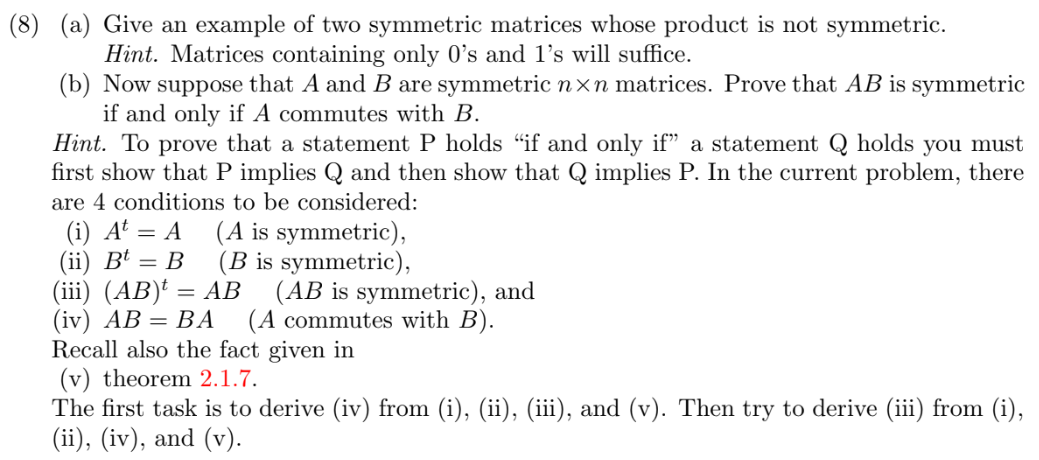

In [314]:
# two matrices that are symmetric but the product is not
A = Matrix(np.matrix('0 1 0;1 0 1;0 1 0'))
B = Matrix(np.matrix('1 0 1;0 1 0;1 0 1'))
matrow = [latex(x) for x in [A, B, A*B, B*A]]
ansprint("(a) here are two symmetric matrices where AB and BA are not symmetric:")
display(Math(r'\quad'.join(matrow)))

***********************************--ANSWER--***********************************

(a) here are two symmetric matrices where AB and BA are not symmetric:

***********************************--ANSWER--***********************************


<IPython.core.display.Math object>

In [315]:
# I'm not interested in figuring out a rigorous proof, but
# From above, A and B are symmetric but when AB is not symmetric, neither is BA
# I think if A anb B are symmetric and AB is not symmetric, then BA = AB.T
# So if A commutes with B (AB = BA), then AB.T = BA.T and that only happens when
# BA and AB are symmetric.